In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Loading the Dataset
df = pd.read_csv('/content/Credit_card_farud_detection(project).csv')
print(df)

       Sr.No trans_date_trans_time        cc_num  \
0        0.0      21-06-2020 12:14  2.290000e+15   
1        1.0      21-06-2020 12:14  3.570000e+15   
2        2.0      21-06-2020 12:14  3.600000e+15   
3        3.0      21-06-2020 12:15  3.590000e+15   
4        4.0      21-06-2020 12:15  3.530000e+15   
...      ...                   ...           ...   
2995  2995.0      22-06-2020 07:37  4.860000e+12   
2996  2996.0      22-06-2020 07:38  3.440000e+14   
2997  2997.0      22-06-2020 07:38  1.800000e+14   
2998  2998.0      22-06-2020 07:38  4.990000e+12   
2999     NaN                   NaN           NaN   

                                  merchant        category     amt      first  \
0                    fraud_Kirlin and Sons   personal_care    2.86       Jeff   
1                     fraud_Sporer-Keebler   personal_care   29.84     Joanne   
2     fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28     Ashley   
3                        fraud_Haley Group        m

In [3]:
# This will display the first 5 rows of the DataFrame by default.
df.head()

,Sr.No,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0
1,1.0,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,1
2,2.0,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0
3,3.0,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,1
4,4.0,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0


In [4]:
#To take a look at the last five rows as default
df.tail()

,Sr.No,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2995,2995.0,22-06-2020 07:37,4.860000e+12,fraud_Ledner-Pfannerstill,gas_transport,57.36,Elizabeth,Payne,M,897 Daugherty Mission,...,41.0036,-78.1104,489.0,Pension scheme manager,15-09-1956,c711deca15830f3ff56e34494658fcc3,1.371887e+09,41.036965,-78.554885,1
2996,2996.0,22-06-2020 07:38,3.440000e+14,fraud_Kuphal-Toy,food_dining,299.39,Ruth,Fuller,M,37732 Joe Courts Apt. 752,...,31.3826,-81.4312,5989.0,Tax adviser,05-05-1967,5639d5232606946d12e0f4ee6ba5dacd,1.371887e+09,32.105812,-81.589467,1
2997,2997.0,22-06-2020 07:38,1.800000e+14,fraud_Pouros-Haag,shopping_pos,3.21,Connie,Carroll,M,872 Justin Views Suite 746,...,34.0470,-90.7652,466.0,Trading standards officer,03-04-1955,fcb7a6456215f55b3bacdd6fe02167ff,1.371887e+09,33.685027,-90.720395,0
2998,2998.0,22-06-2020 07:38,4.990000e+12,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,91.93,Martin,Ford,M,56812 Francis Courts,...,39.6967,-78.8031,626.0,Energy engineer,13-12-1960,683b8a9c506b51499a0bb257463e3e14,1.371887e+09,38.861174,-78.604461,0
2999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
#checking the duplicates in the dataframe.
df.duplicated().any()

False

In [6]:
#print the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr.No                  2999 non-null   float64
 1   trans_date_trans_time  2999 non-null   object 
 2   cc_num                 2999 non-null   float64
 3   merchant               2999 non-null   object 
 4   category               2999 non-null   object 
 5   amt                    2999 non-null   float64
 6   first                  2999 non-null   object 
 7   last                   2999 non-null   object 
 8   gender                 3000 non-null   object 
 9   street                 2999 non-null   object 
 10  city                   2999 non-null   object 
 11  state                  2999 non-null   object 
 12  zip                    2999 non-null   float64
 13  lat                    2999 non-null   float64
 14  long                   2999 non-null   float64
 15  city

In [7]:
#To know the total number of rows and columns in the data set
df.shape

(3000, 23)

In [8]:
# Shows basic statistics (like mean, min, max) for each numerical column in the DataFrame
df.describe()

,Sr.No,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2999.000000,2.999000e+03,2999.000000,2999.000000,2999.000000,2999.000000,2.999000e+03,2.999000e+03,2999.000000,2999.000000,3000.000000
mean,1499.000000,4.124974e+17,69.065355,48532.296432,38.376559,-89.860514,1.017304e+05,1.371849e+09,38.363895,-89.861396,0.066333
std,865.881054,1.306469e+18,139.322323,26635.019978,5.084007,13.311699,3.399801e+05,2.000522e+04,5.119511,13.325046,0.303255
min,0.000000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,20.733607,-166.146884,0.000000
25%,749.500000,1.800000e+14,9.380000,26339.000000,34.459600,-96.601200,8.230000e+02,1.371832e+09,34.517382,-96.485225,0.000000
50%,1499.000000,3.520000e+15,43.790000,47515.000000,39.094500,-86.947500,2.916000e+03,1.371848e+09,39.151823,-87.193562,0.000000
75%,2248.500000,4.650000e+15,79.135000,72011.000000,41.846700,-80.276000,2.655100e+04,1.371866e+09,41.926460,-80.287791,0.000000
max,2998.000000,4.990000e+18,3204.980000,99783.000000,64.755600,-67.950300,2.906700e+06,1.371887e+09,65.140345,-67.254668,10.000000


In [9]:
#printing the value distribution.count the occurrences of each unique value in the city column of the DataFrame df.
print(df['city'].value_counts())

city
Phoenix        18
Bowdoin        15
Detroit        14
Norman         14
Birmingham     13
               ..
West Bethel     1
Shedd           1
Winthrop        1
Kilgore         1
Quanah          1
Name: count, Length: 754, dtype: int64


In [10]:
#Data Cleaning
#Printing the no of duplicate rows
print(df.duplicated().sum())
#remove duplicates removes the duplicate rows
df.drop_duplicates()

0


,Sr.No,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0
1,1.0,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,1
2,2.0,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0
3,3.0,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,1
4,4.0,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995.0,22-06-2020 07:37,4.860000e+12,fraud_Ledner-Pfannerstill,gas_transport,57.36,Elizabeth,Payne,M,897 Daugherty Mission,...,41.0036,-78.1104,489.0,Pension scheme manager,15-09-1956,c711deca15830f3ff56e34494658fcc3,1.371887e+09,41.036965,-78.554885,1
2996,2996.0,22-06-2020 07:38,3.440000e+14,fraud_Kuphal-Toy,food_dining,299.39,Ruth,Fuller,M,37732 Joe Courts Apt. 752,...,31.3826,-81.4312,5989.0,Tax adviser,05-05-1967,5639d5232606946d12e0f4ee6ba5dacd,1.371887e+09,32.105812,-81.589467,1
2997,2997.0,22-06-2020 07:38,1.800000e+14,fraud_Pouros-Haag,shopping_pos,3.21,Connie,Carroll,M,872 Justin Views Suite 746,...,34.0470,-90.7652,466.0,Trading standards officer,03-04-1955,fcb7a6456215f55b3bacdd6fe02167ff,1.371887e+09,33.685027,-90.720395,0
2998,2998.0,22-06-2020 07:38,4.990000e+12,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,91.93,Martin,Ford,M,56812 Francis Courts,...,39.6967,-78.8031,626.0,Energy engineer,13-12-1960,683b8a9c506b51499a0bb257463e3e14,1.371887e+09,38.861174,-78.604461,0


In [11]:
#counting all null values
df.isnull().sum()

,0
Sr.No,1
trans_date_trans_time,1
cc_num,1
merchant,1
category,1
amt,1
first,1
last,1
gender,0
street,1


In [12]:
df = df.dropna()  # Remove all rows with NaN values
df  # Display the updated DataFrame


,Sr.No,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0
1,1.0,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,1
2,2.0,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0
3,3.0,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,1
4,4.0,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2994.0,22-06-2020 07:37,2.130000e+14,fraud_Howe PLC,entertainment,1.56,Catherine,Weber,M,74890 Rodriguez Springs Apt. 540,...,43.0397,-77.6871,10256.0,"Teacher, primary school",24-06-1968,72ae676ee527dd45f0887cf27b597422,1.371887e+09,42.628344,-77.957834,1
2995,2995.0,22-06-2020 07:37,4.860000e+12,fraud_Ledner-Pfannerstill,gas_transport,57.36,Elizabeth,Payne,M,897 Daugherty Mission,...,41.0036,-78.1104,489.0,Pension scheme manager,15-09-1956,c711deca15830f3ff56e34494658fcc3,1.371887e+09,41.036965,-78.554885,1
2996,2996.0,22-06-2020 07:38,3.440000e+14,fraud_Kuphal-Toy,food_dining,299.39,Ruth,Fuller,M,37732 Joe Courts Apt. 752,...,31.3826,-81.4312,5989.0,Tax adviser,05-05-1967,5639d5232606946d12e0f4ee6ba5dacd,1.371887e+09,32.105812,-81.589467,1
2997,2997.0,22-06-2020 07:38,1.800000e+14,fraud_Pouros-Haag,shopping_pos,3.21,Connie,Carroll,M,872 Justin Views Suite 746,...,34.0470,-90.7652,466.0,Trading standards officer,03-04-1955,fcb7a6456215f55b3bacdd6fe02167ff,1.371887e+09,33.685027,-90.720395,0


In [13]:
#Count unique values
df.nunique()

,0
Sr.No,2999
trans_date_trans_time,1074
cc_num,295
merchant,671
category,14
amt,2564
first,329
last,431
gender,2
street,814


In [14]:
# Count and display the frequency of each unique value in the 'city' column.
print(df['city'].value_counts().head(3))


city
Phoenix    18
Bowdoin    15
Detroit    14
Name: count, dtype: int64


In [16]:
# Display the counts of the top 3 most frequent gender values in the dataset
print(df['gender'].value_counts().head(3))

gender
F    1687
M    1312
Name: count, dtype: int64


In [17]:
df.tail(3)  # Displays the last 3 rows.


,Sr.No,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2996,2996.0,22-06-2020 07:38,3.440000e+14,fraud_Kuphal-Toy,food_dining,299.39,Ruth,Fuller,M,37732 Joe Courts Apt. 752,...,31.3826,-81.4312,5989.0,Tax adviser,05-05-1967,5639d5232606946d12e0f4ee6ba5dacd,1.371887e+09,32.105812,-81.589467,1
2997,2997.0,22-06-2020 07:38,1.800000e+14,fraud_Pouros-Haag,shopping_pos,3.21,Connie,Carroll,M,872 Justin Views Suite 746,...,34.0470,-90.7652,466.0,Trading standards officer,03-04-1955,fcb7a6456215f55b3bacdd6fe02167ff,1.371887e+09,33.685027,-90.720395,0
2998,2998.0,22-06-2020 07:38,4.990000e+12,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,91.93,Martin,Ford,M,56812 Francis Courts,...,39.6967,-78.8031,626.0,Energy engineer,13-12-1960,683b8a9c506b51499a0bb257463e3e14,1.371887e+09,38.861174,-78.604461,0


In [18]:
# Filter fraudulent transactions
fraud_data = df[df['is_fraud'] == 1]

# Count fraudulent transactions per state and sort in descending order
top_5_states = fraud_data['state'].value_counts().head(5)

# Display the result
print(top_5_states)


state
TX    18
NY    13
CA    10
PA     9
MI     9
Name: count, dtype: int64


In [19]:
# Total transactions
total_transactions = len(df)
print("Total Transactions:", total_transactions)


Total Transactions: 2999


Fraudulent Transactions: 189


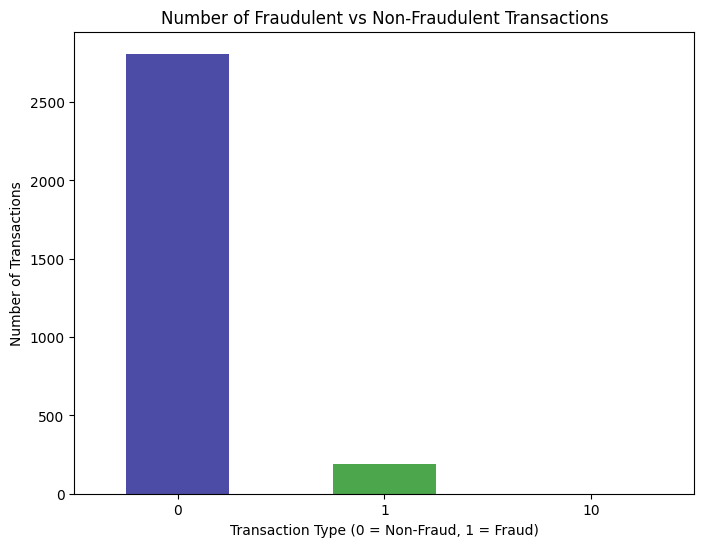

In [20]:
#Distrubution of the Fradulent and non-fradulent transactions.
fraudulent_count = df[df['is_fraud'] == 1].shape[0]
print("Fraudulent Transactions:", fraudulent_count)

# Count the number of fraudulent and non-fraudulent transactions
fraud_counts = df['is_fraud'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['navy', 'green'], alpha=0.7)
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()
# Conclusion
# This bar chart shows Fradulent and non-fradulent transactions.
# There are  fradulent transaction are mentioned in the graph fradulent transactions are 189


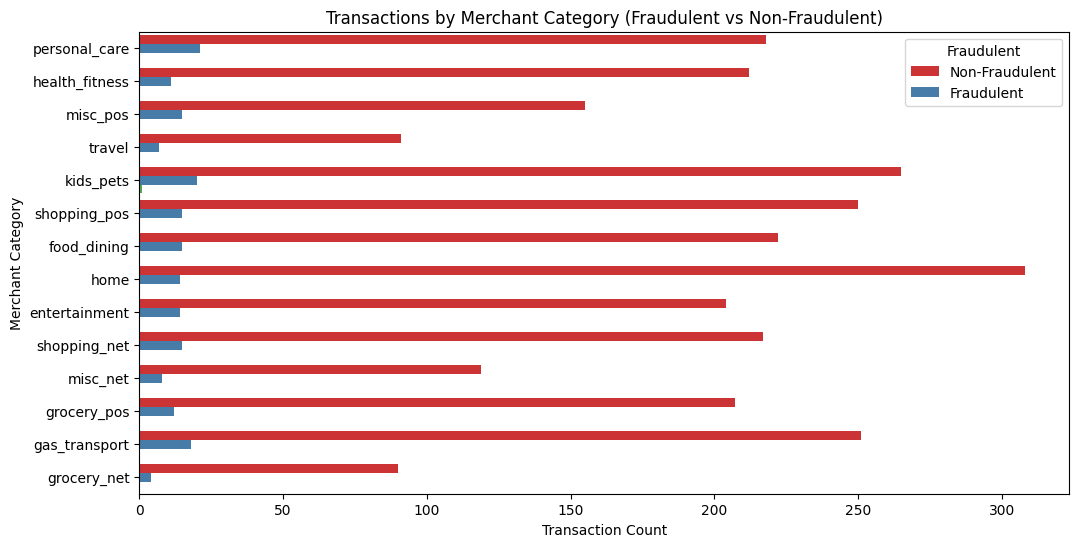

In [45]:
# Bar Plot for Merchant Categories Prone to Fraud
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="category", hue="is_fraud", palette="Set1")
plt.title("Transactions by Merchant Category (Fraudulent vs Non-Fraudulent)")
plt.xlabel("Transaction Count")
plt.ylabel("Merchant Category")
plt.legend(title="Fraudulent", labels=["Non-Fraudulent", "Fraudulent"])
plt.show()
# Conclusion
# This is horizontal bar chart shows Fradulent and non-fradulent transactions.

Average Transaction Amount: 69.06535511837279


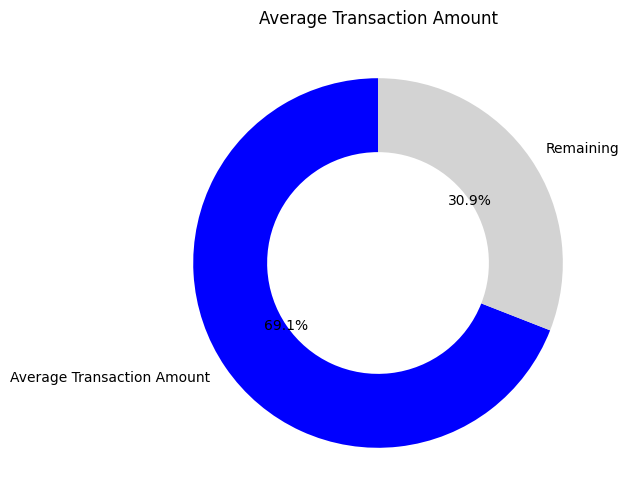

In [43]:
import matplotlib.pyplot as plt

# Calculate the average transaction amount
average_amount = df['amt'].mean()
print("Average Transaction Amount:", average_amount)

# Create a donut chart
plt.figure(figsize=(6, 6))
plt.pie([average_amount, 100 - average_amount], labels=['Average Transaction Amount', 'Remaining'],
        colors=['blue', 'lightgray'], wedgeprops={'width': 0.4}, startangle=90, autopct='%1.1f%%')

# Add a title and display the chart
plt.title('Average Transaction Amount')
plt.show()
# Conclusion:-This is a Donut Chart that displays the Average Transaction Amount

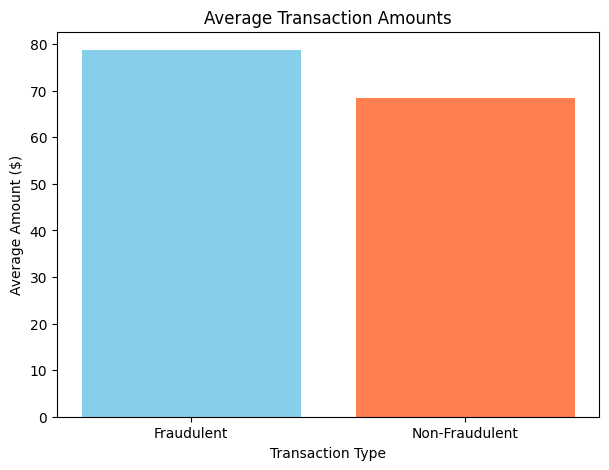

In [24]:
# the average transaction amount for fraudulent and non-fraudulent transactions
import matplotlib.pyplot as plt

# Calculate average transaction amounts
avg_amt_fraud = df[df['is_fraud'] == 1]['amt'].mean()
avg_amt_non_fraud = df[df['is_fraud'] == 0]['amt'].mean()

# Data for plotting
categories = ['Fraudulent', 'Non-Fraudulent']
average_amounts = [avg_amt_fraud, avg_amt_non_fraud]

# Plot the bar graph
plt.figure(figsize=(7, 5))
plt.bar(categories, average_amounts, color=['skyblue', 'coral'])
plt.title('Average Transaction Amounts')
plt.ylabel('Average Amount ($)')
plt.xlabel('Transaction Type')
plt.show()
# Conclusion:-
# This bar chart shows Fradulent and non-fradulent transactions.
# THe Fradulent Transactions Average amount is more than Non-Fradulent Traansaction

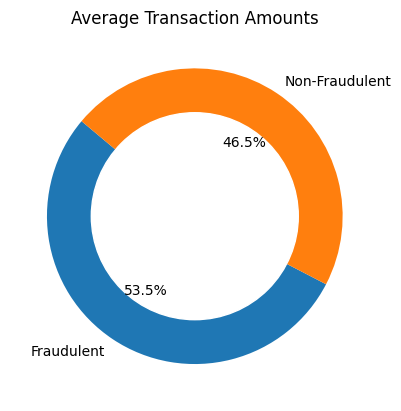

In [44]:
# Transaction Amounts Averge
avg_amt_fraud = df[df['is_fraud'] == 1]['amt'].mean() # df is now defined
avg_amt_non_fraud = df[df['is_fraud'] == 0]['amt'].mean()

plt.pie([avg_amt_fraud, avg_amt_non_fraud], labels=['Fraudulent', 'Non-Fraudulent'],
        autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))
plt.title('Average Transaction Amounts')
plt.show()
# Conclusion:-
# This pie chart shows the average transaction amounts for fradulent and non-fradulent transactions.


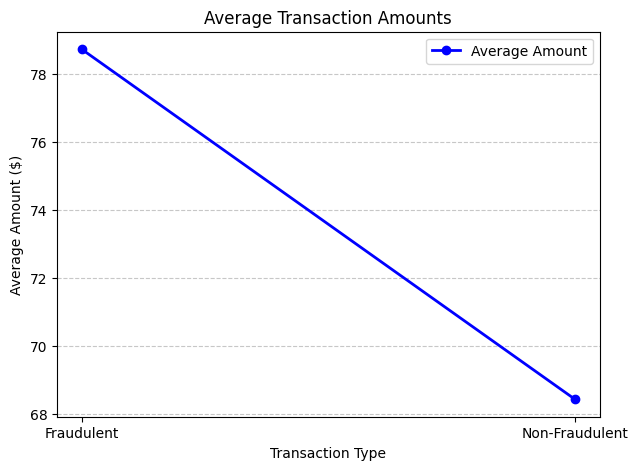

In [27]:
# Calculate average transaction amounts
avg_amt_fraud = df[df['is_fraud'] == 1]['amt'].mean()
avg_amt_non_fraud = df[df['is_fraud'] == 0]['amt'].mean()

# Data for plotting
categories = ['Fraudulent', 'Non-Fraudulent']
average_amounts = [avg_amt_fraud, avg_amt_non_fraud]

# Plot the line graph
plt.figure(figsize=(7, 5))
plt.plot(categories, average_amounts, marker='o', color='blue', linewidth=2, label='Average Amount')
plt.title('Average Transaction Amounts')
plt.ylabel('Average Amount ($)')
plt.xlabel('Transaction Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()
# Conclusion:-
# This line chart shows the average Transaction amount for fradulent and non-fradulent transactions.


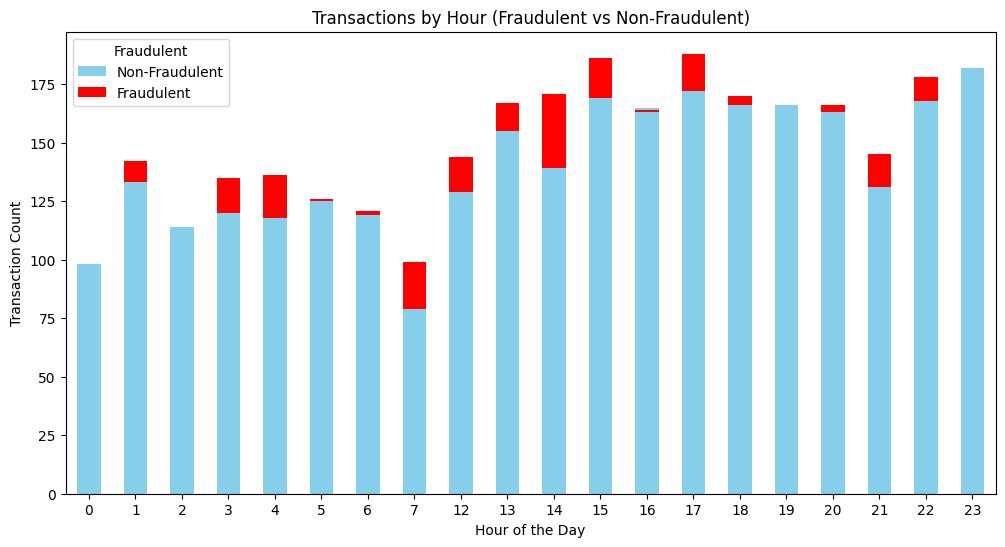

In [28]:
# Extract the hour from the transaction timestamp
df["hour"] = pd.to_datetime(df["trans_date_trans_time"], format="%d-%m-%Y %H:%M", dayfirst=True).dt.hour

# Group transactions by hour and fraud status
hourly_fraud = df.groupby(["hour", "is_fraud"]).size().unstack()

# Bar chart for transaction timing
hourly_fraud.plot(kind="bar", figsize=(12, 6), stacked=True, color=["skyblue", "red"])
plt.title("Transactions by Hour (Fraudulent vs Non-Fraudulent)")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.legend(["Non-Fraudulent", "Fraudulent"], title="Fraudulent")
plt.xticks(rotation=0)
plt.show()
# Conclusion:-
# This bar chart shows the transactions by hour for fradulent and non-fradulent transactions.



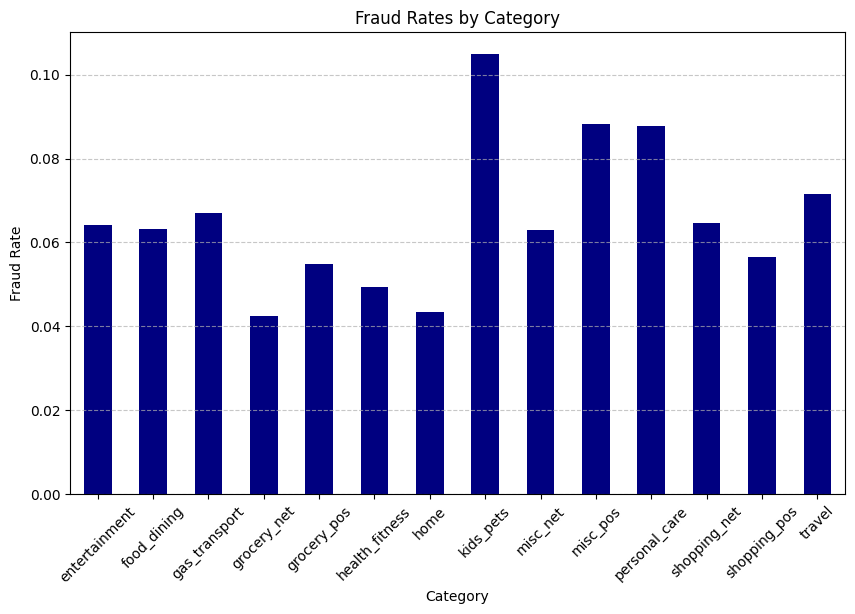

In [29]:
# Calculate fraud rates by category
fraud_category_rates = df.groupby("category")["is_fraud"].mean()

# Bar Chart for Fraud Rates by Category
plt.figure(figsize=(10, 6))
fraud_category_rates.plot(kind="bar", color="navy")
plt.title("Fraud Rates by Category")
plt.ylabel("Fraud Rate")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Conclusion:-
# This bar chart shows the fraud rates by category for fradulent and non-fradulent transactions.


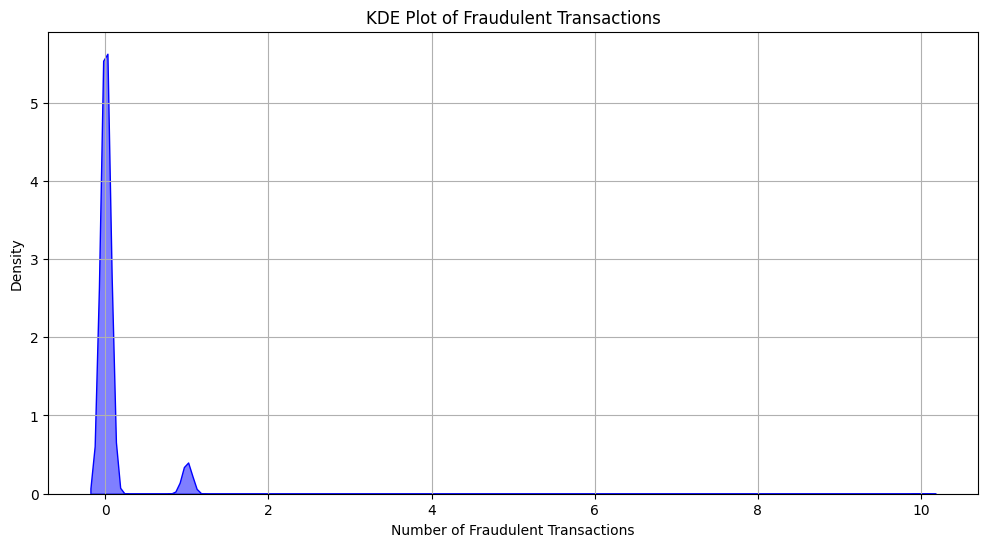

In [30]:
# KDE Plot
plt.figure(figsize=(12, 6))
# Use df['is_fraud'] to access the correct column
sns.kdeplot(df['is_fraud'], fill=True, color="blue", alpha=0.5)
plt.title('KDE Plot of Fraudulent Transactions')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Density')
plt.grid()
plt.show()
# Conclusion:-
# This is a kde plot shows the density of fradulent transactions


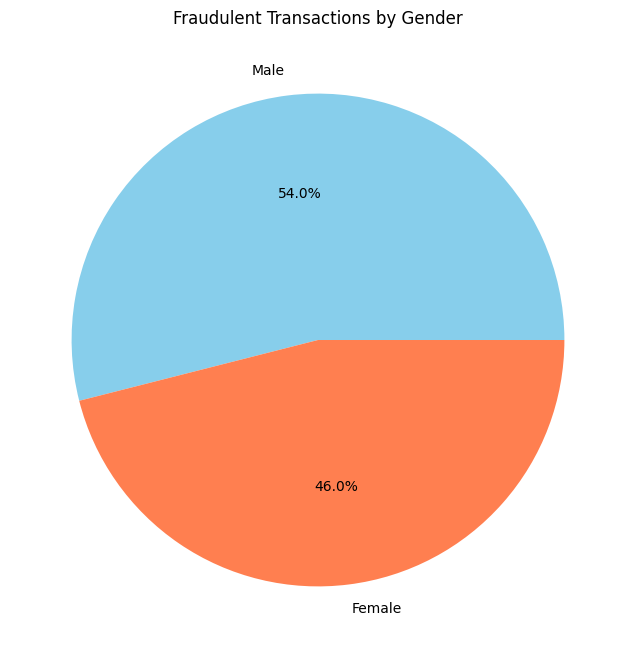

In [31]:
# Gender-based fraud count
gender_fraud = df[df['is_fraud'] == 1]['gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
gender_fraud.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'coral'], labels=['Male', 'Female'])
plt.title('Fraudulent Transactions by Gender')
plt.ylabel('')
plt.show()
# Conclusion:-
# This is a pie chart shows the Fradulent Transaction By gender.


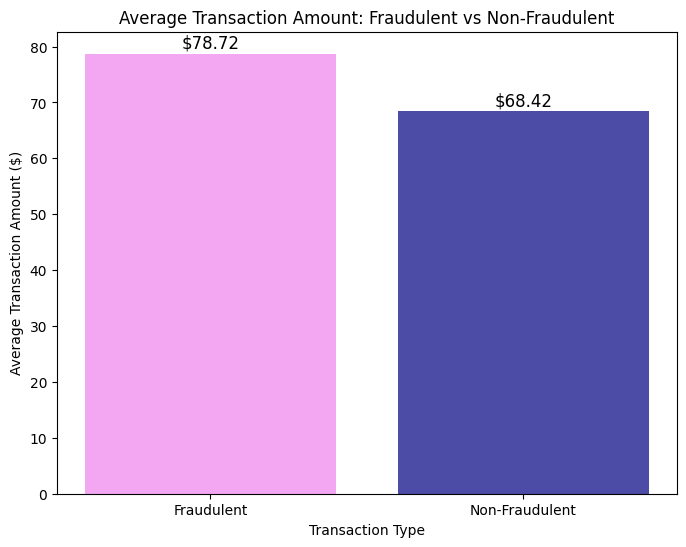

In [32]:

# Calculate average transaction amounts
avg_amt_fraudulent = df[df['is_fraud'] == 1]['amt'].mean()
avg_amt_non_fraudulent = df[df['is_fraud'] == 0]['amt'].mean()

# Prepare data for visualization
categories = ['Fraudulent', 'Non-Fraudulent']
avg_amounts = [avg_amt_fraudulent, avg_amt_non_fraudulent]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, avg_amounts, color=['violet', 'navy'], alpha=0.7)
plt.title('Average Transaction Amount: Fraudulent vs Non-Fraudulent')
plt.ylabel('Average Transaction Amount ($)')
plt.xlabel('Transaction Type')

# Annotate the bars with values
for i, amt in enumerate(avg_amounts):
    plt.text(i, amt + 1, f"${amt:.2f}", ha='center', fontsize=12)

plt.show()
# Conclusion:-
#This is a Bar graph shows the average transaction amount (amt) for fraudulent and non-fraudulent transactions


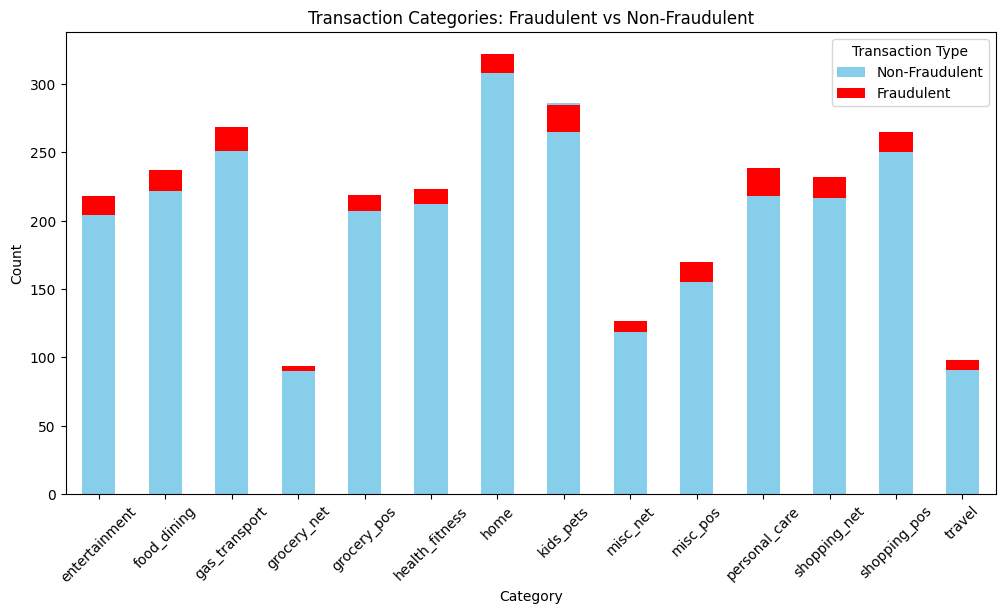

In [33]:
#proportion of transaction categories in fraudulent and non-fraudulent transactions
category_counts = df.groupby(['category', 'is_fraud']).size().unstack()

# Stacked Bar Plot
category_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'red'])
plt.title('Transaction Categories: Fraudulent vs Non-Fraudulent')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(['Non-Fraudulent', 'Fraudulent'], title="Transaction Type")
plt.xticks(rotation=45)
plt.show()
#Conclusion:-
# This a Bar Graph shows the Transaction categories of Fradulent and non-fradulent transaction.

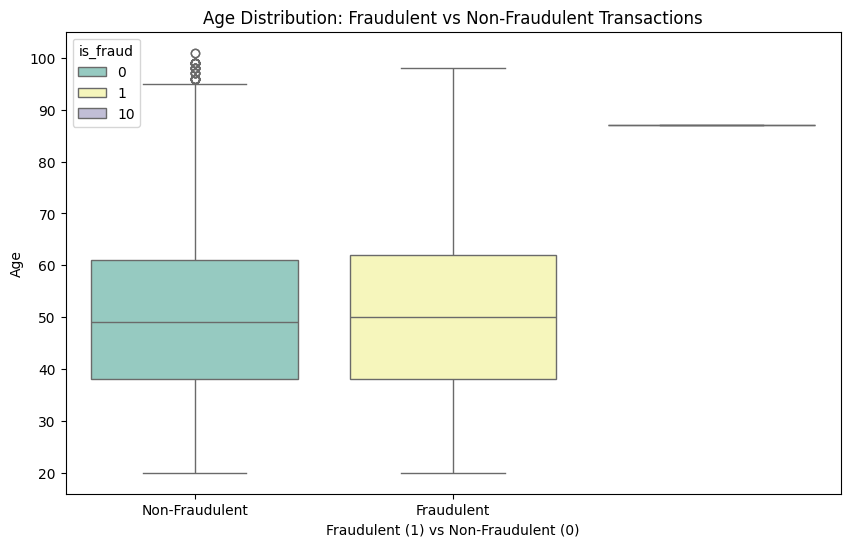

In [46]:
import datetime as dt

# Calculate customer age from DOB
current_year = dt.datetime.now().year
df["age"] = current_year - pd.to_datetime(df["dob"], format="%d-%m-%Y").dt.year

# Box Plot for Age Distribution: Fraudulent vs Non-Fraudulent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="is_fraud", y="age", hue="is_fraud", palette="Set3", dodge=False)
plt.title("Age Distribution: Fraudulent vs Non-Fraudulent Transactions")
plt.xticks([0, 1], ["Non-Fraudulent", "Fraudulent"])
plt.xlabel("Fraudulent (1) vs Non-Fraudulent (0)")
plt.ylabel("Age")
plt.show()
#Conclusion:-
# This is a Box plot that shows the age distributions between fradulent and Non-fardulent transactions

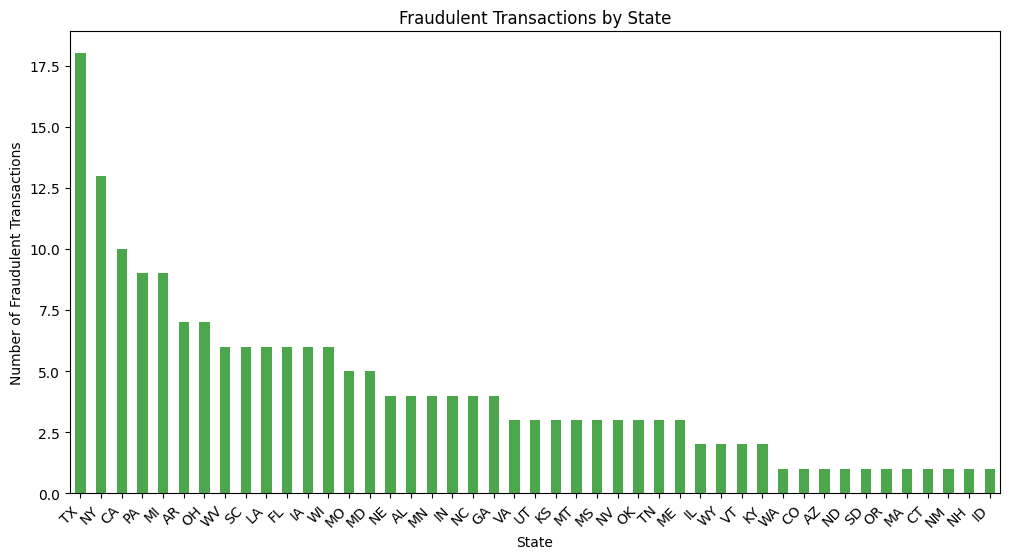

In [36]:
#trends are observed in fraudulent transactions across states
fraud_by_state = df[df['is_fraud'] == 1]['state'].value_counts()

# Bar Plot
plt.figure(figsize=(12, 6))
fraud_by_state.plot(kind='bar', color='green', alpha=0.7)
plt.title('Fraudulent Transactions by State')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45, ha='right')
plt.show()
#Conclusion:-
# This is a Bar chart that shows the fradulent transactions by state.


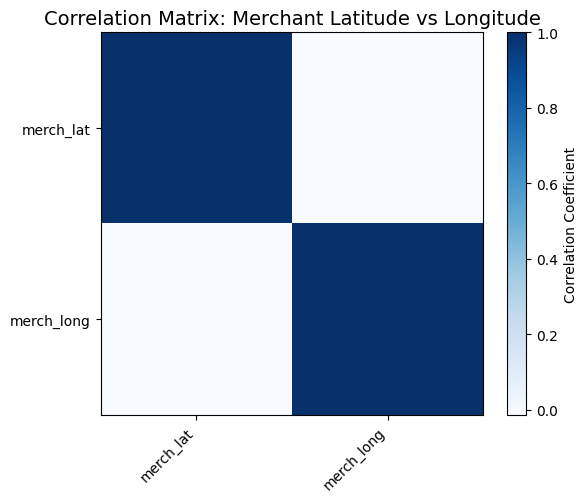

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix for merchant latitude and longitude
correlation_matrix = df[['merch_lat', 'merch_long']].corr()

# Plot the heatmap using Matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap='Blues', interpolation='none')  # Use a navy-blue color palette
plt.colorbar(label='Correlation Coefficient')

# Add labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=10)
plt.title('Correlation Matrix: Merchant Latitude vs Longitude', fontsize=14)

# Improve layout and spacing
plt.tight_layout()
plt.show()
#Conclusion:-
# Tis is a correlation matrix that shows the correlation between merchant latitude and longitude



Conclusion:

1.Fraudulent transactions can be identified and analyzed using conditional filters and group-by operations.

2.Categories, merchant types, and time of day show notable fraud trends.
Visualizations like bar charts and time series graphs are effective for understanding patterns.

3.Gender and state-level analyses highlight demographic and geographic factors influencing fraud rates.





